# Churn for Bank Customers

## Задача: установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов

Импорт библиотек и исходного файла с данными

In [206]:
import pandas as pd
plt.style.use('default')
churn_data = pd.read_csv('data/churn.csv')

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [209]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [210]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

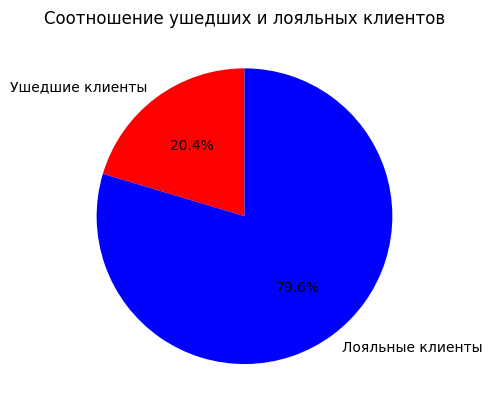

In [214]:
Exited_Yes = churn_data['Exited'].sum()
Exited_No = churn_data.count()[1] - Exited_Yes
names = 'Ушедшие клиенты', 'Лояльные клиенты'
colors = ['red','blue']  
plt.pie([Exited_Yes,Exited_No], colors=colors, labels=names, autopct='%1.1f%%', startangle=90)
plt.title('Соотношение ушедших и лояльных клиентов')
plt.show()

Вывод: Ушедшие клиенты составляют примерно пятую часть от общего количества клиентов банка

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [232]:
mask = (churn_data['Exited'] == 0) & (churn_data['Balance'] > 2500)
VIP_clients = churn_data[mask].groupby('Age')['Balance'].sum()

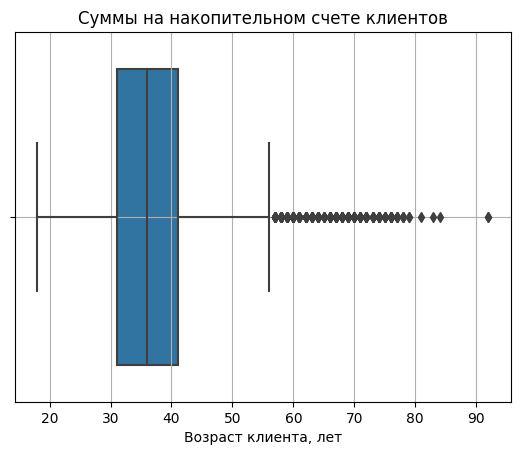

In [234]:
box = sns.boxplot(
    data = churn_data[mask],
    x = 'Age',
    orient = 'h'
)
box.set_title('Суммы на накопительном счете клиентов')
box.set_xlabel('Возраст клиента, лет')
box.grid()

*Вывод: Основные вкладчики банка располагаются в возрастной группе чуть выше диапазона 30 - 40 лет с медианой около 36 лет.*

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

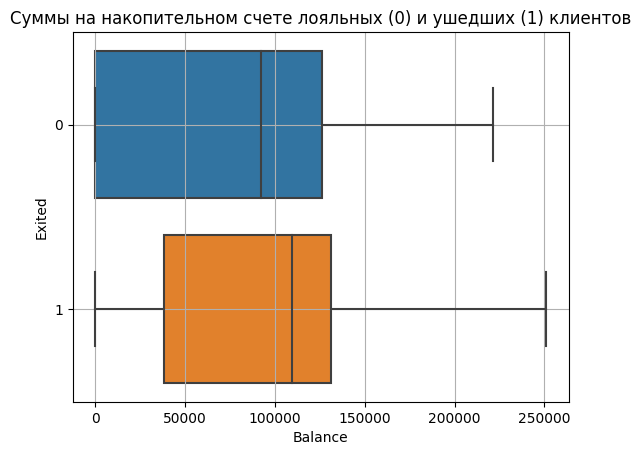

In [26]:
box = sns.boxplot(
    data = churn_data,
    x = 'Balance',
    y = 'Exited',
    orient = 'h'
)
box.set_title('Суммы на накопительных счетах лояльных (0) и ушедших (1) клиентов')
box.grid()

*Вывод: суммы на счетах ушедших клиентов в основном выше, чем у лояльных. Банк склонны покидать более состоятельные клиенты*

### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

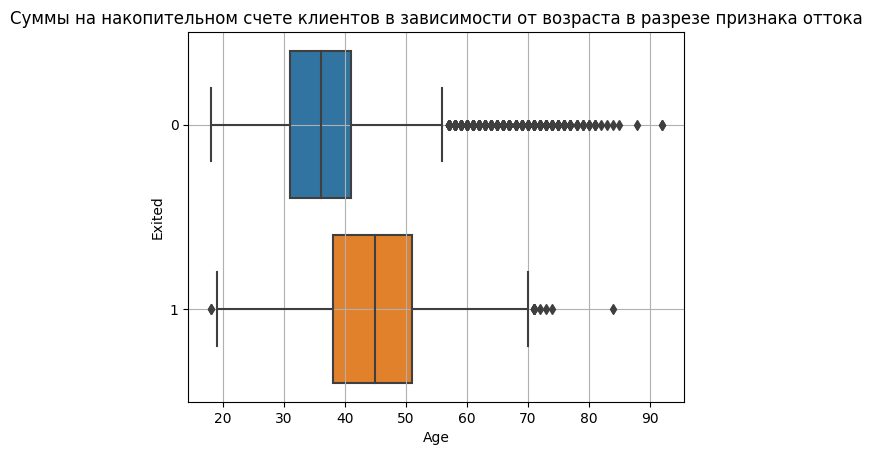

In [30]:
box = sns.boxplot(
    data = churn_data,
    x = 'Age',
    y = 'Exited',
    orient = 'h'
)
box.set_title('Суммы на накопительном счете клиентов в зависимости от возраста в разрезе признака оттока')
box.grid()

*Вывод: у лояльных клиентов больше потенциальных выбросов по возрасту. Банку следует уделить внимание возрастной категории старше 40 лет, так как в ней выше доля ушедших клиентов*

### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [236]:
cs0_data = churn_data[churn_data['Exited'] == 0].groupby('CreditScore')['EstimatedSalary'].mean()
cs1_data = churn_data[churn_data['Exited'] == 1].groupby('CreditScore')['EstimatedSalary'].mean()

Text(0.5, 1.0, 'Взаимосвязь кредитного рейтинга клиентов с их предполагаемой зарплатой')

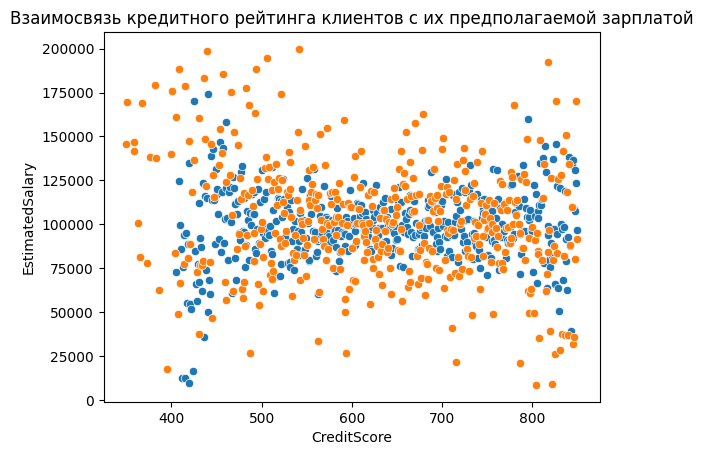

In [240]:
plot1 = sns.scatterplot(data=cs0_data)
plot1 = sns.scatterplot(data=cs1_data)
plot1.set_title('Взаимосвязь кредитного рейтинга клиентов с их предполагаемой зарплатой')

*Вывод: Явной зависимости кредитного рейтинга клиентов от их предполагаемой зарплатой не прослеживается. Из графика лишь заметно, что у клиентов со средним кредитным рейтингом более предсказуемая зарплата (меньше разброс)*

## 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [241]:
gender_data = churn_data.groupby('Gender')['Exited'].mean() * 100

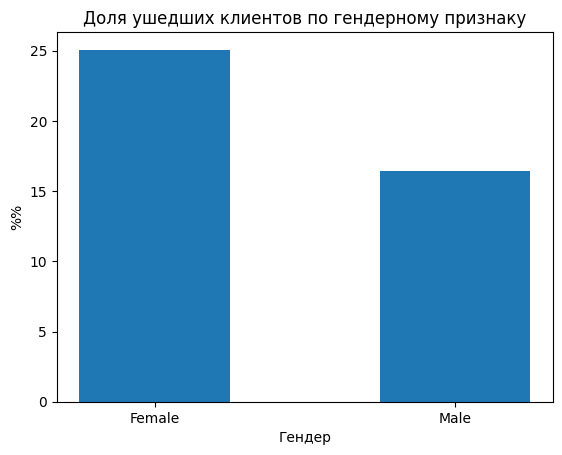

In [242]:
plt.bar(gender_data.index, gender_data.values, width=0.5) 
plt.xlabel('Гендер')
plt.ylabel('%%')
plt.title('Доля ушедших клиентов по гендерному признаку') 
plt.show()


*Вывод: женщины уходят чаще*

## 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [198]:
nop_data = churn_data.groupby(by=['NumOfProducts','Exited'], as_index=False).count()

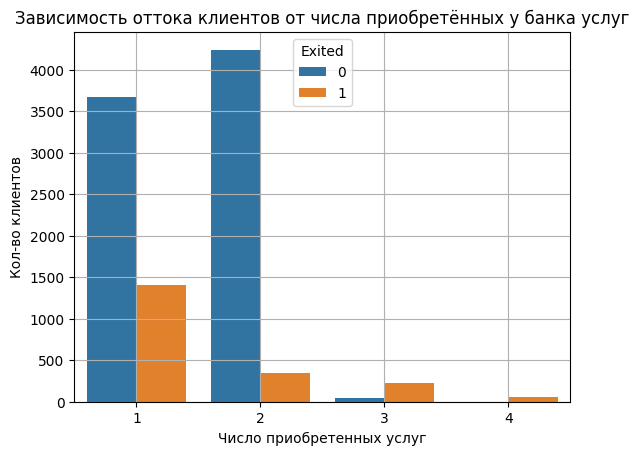

In [201]:
barplot = sns.barplot(
    data = nop_data,
    x = 'NumOfProducts',
    y = 'RowNumber',
    hue = 'Exited'
)
barplot.set_title('Зависимость оттока клиентов от числа приобретённых у банка услуг')
barplot.set_xlabel('Число приобретенных услуг')
barplot.set_ylabel('Кол-во клиентов');
barplot.grid();

*Вывод: отток клиентов падает с увеличением количества приобретенных услуг, при этом лояльные клиенты предпочитают покупать не более 2х услуг*

## 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [243]:
active_data = churn_data.groupby('IsActiveMember')['Exited'].mean() * 100

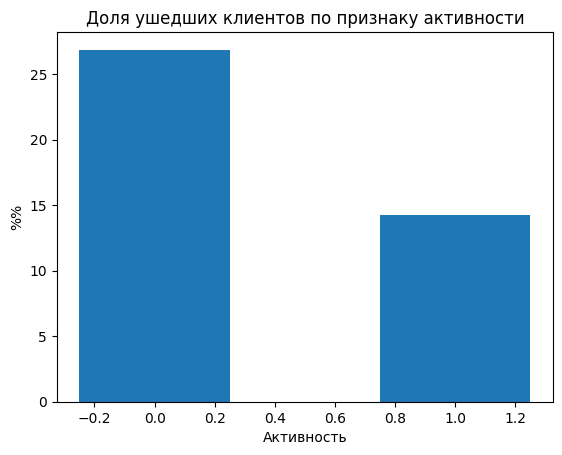

In [244]:
plt.bar(active_data.index, active_data.values, width=0.5) 
plt.xlabel('Активность')
plt.ylabel('%%')
plt.title('Доля ушедших клиентов по признаку активности') 
plt.show()

*Вывод: неактивные клиенты уходят чаще. Необходимо обратить на них внимание*

## 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [229]:
map_data = churn_data.groupby(by='Geography')['Exited'].mean() * 100

In [231]:
fig = px.choropleth(
    data_frame=map_data,
    locations = map_data.index,
    locationmode = 'country names',
    color = map_data.values,
    range_color=[0, 100],
    title='exit',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)
fig.show()

*Вывод: клиенты из Германии уходят чаще, так как они в среднем более состоятельные (смотри вывод в параграфе 9.3)*

## 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [246]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Good
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Poor
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Good
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Good


## Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

In [269]:
pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat'
)
#pivot.columns = pivot.columns.astype('string')
display(pivot)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


## На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

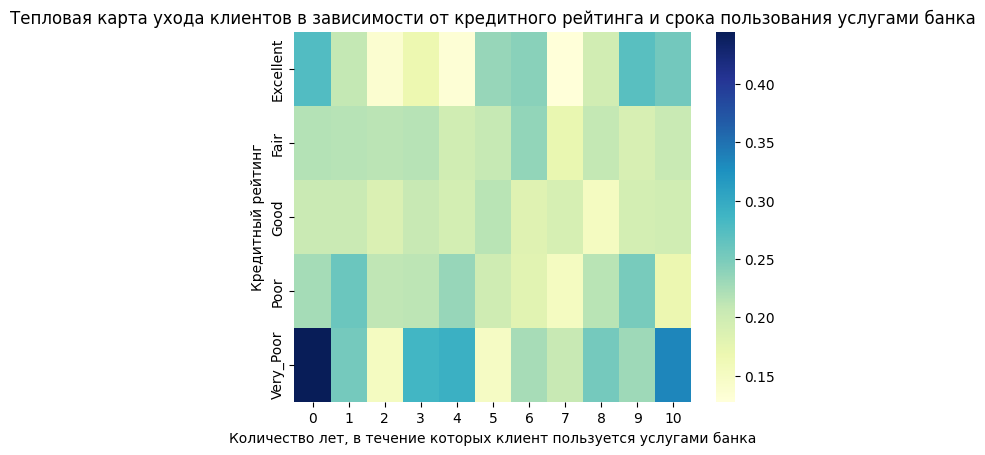

In [274]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта ухода клиентов в зависимости от кредитного рейтинга и срока пользования услугами банка', fontsize=12)
heatmap.set_xlabel('Количество лет, в течение которых клиент пользуется услугами банка')
heatmap.set_ylabel('Кредитный рейтинг');


*Вывод: к уходу склонны клиенты с пограничными значениями. Новички и старожилы с низким кредитным рейтингом, либо с чрезвычайно высоким рейтингом*